In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as prep

In [2]:
#Import the data first
kaggle=pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

In [3]:
kaggle

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [4]:
kaggle_crime_race=kaggle.loc[:,['Perceived_Race','Actions_at_arrest___Cooperative']]

In [5]:
kaggle_crime_race_group=kaggle_crime_race.groupby('Perceived_Race').describe()

In [6]:
kaggle_crime_race_group

Actions_at_arrest___Cooperative                           \
                                               count      mean       std  min   
Perceived_Race                                                                  
Black                                        17526.0  0.425996  0.494507  0.0   
East/Southeast Asian                          4415.0  0.513703  0.499869  0.0   
Indigenous                                    1934.0  0.394002  0.488762  0.0   
Latino                                        1768.0  0.507353  0.500087  0.0   
Middle-Eastern                                3237.0  0.467717  0.499034  0.0   
South Asian                                   3613.0  0.461389  0.498576  0.0   
Unknown or Legacy                             5056.0  0.438884  0.496300  0.0   
White                                        27723.0  0.444216  0.496887  0.0   

                                          
                      25%  50%  75%  max  
Perceived_Race                            
Black                 0.0  0.0  1.0  1.0  
East/Southeast Asian  0.0  1.0  1.0  1.0  
Indigenous            0.0  0.0  1.0  1.0  
Latino                0.0  1.0  1.0  1.0  
Middle-Eastern        0.0  0.0  1.0  1.0  
South Asian           0.0  0.0  1.0  1.0  
Unknown or Legacy     0.0  0.0  1.0  1.0  
White                 0.0  0.0  1.0  1.0

In [7]:
kaggle_crime_sex=kaggle.loc[:,['Sex','Actions_at_arrest___Cooperative']]

In [8]:
kaggle_crime_sex_group=kaggle_crime_sex.groupby('Sex').describe()

In [9]:
kaggle_crime_sex_group

Actions_at_arrest___Cooperative                                          \
                              count      mean       std  min  25%  50%  75%   
Sex                                                                           
F                           12617.0  0.430372  0.495148  0.0  0.0  0.0  1.0   
M                           52650.0  0.449687  0.497467  0.0  0.0  0.0  1.0   
U                               9.0  0.333333  0.500000  0.0  0.0  0.0  1.0   

          
     max  
Sex       
F    1.0  
M    1.0  
U    1.0

In [10]:
kaggle_crime_age=kaggle.loc[:,['Age_group__at_arrest_','Actions_at_arrest___Cooperative']]

In [11]:
kaggle_crime_age=kaggle_crime_age.groupby('Age_group__at_arrest_').describe()

In [12]:
kaggle_crime_age

Actions_at_arrest___Cooperative                      \
                                                    count      mean       std   
Age_group__at_arrest_                                                           
Aged 17 years and under                            1361.0  0.456282  0.498268   
Aged 17 years and younger                          1681.0  0.472933  0.499415   
Aged 18 to 24 years                               10041.0  0.439996  0.496411   
Aged 25 to 34 years                               20949.0  0.435964  0.495894   
Aged 35 to 44 years                               16242.0  0.444219  0.496894   
Aged 45 to 54 years                                9066.0  0.461725  0.498560   
Aged 55 to 64 years                                4590.0  0.455120  0.498036   
Aged 65 and older                                   624.0  0.496795  0.500391   
Aged 65 years and older                             698.0  0.479943  0.499956   

                                                    
                           min  25%  50%  75%  max  
Age_group__at_arrest_                               
Aged 17 years and under    0.0  0.0  0.0  1.0  1.0  
Aged 17 years and younger  0.0  0.0  0.0  1.0  1.0  
Aged 18 to 24 years        0.0  0.0  0.0  1.0  1.0  
Aged 25 to 34 years        0.0  0.0  0.0  1.0  1.0  
Aged 35 to 44 years        0.0  0.0  0.0  1.0  1.0  
Aged 45 to 54 years        0.0  0.0  0.0  1.0  1.0  
Aged 55 to 64 years        0.0  0.0  0.0  1.0  1.0  
Aged 65 and older          0.0  0.0  0.0  1.0  1.0  
Aged 65 years and older    0.0  0.0  0.0  1.0  1.0

Text(0.5, 1.0, 'Cooperative Rate for people with different race')

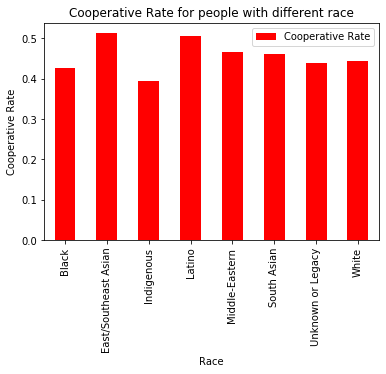

In [13]:
kaggle_race_group_mean=kaggle_crime_race_group.iloc[:,1].rename_axis('Race').reset_index(name='Cooperative Rate')
cooperative_rate=kaggle_crime_race_group.iloc[:,1]
kaggle_race_group_mean.plot.bar(x='Race',color='red')
plt.ylabel('Cooperative Rate')
plt.title('Cooperative Rate for people with different race')

# Data Cleaning

In [14]:
kaggle_null_sum=pd.DataFrame(kaggle.isnull().sum())

In [15]:
kaggle_null_sum

,0
Arrest_Year,0
Arrest_Month,0
EventID,0
ArrestID,469
PersonID,0
Perceived_Race,4
Sex,0
Age_group__at_arrest_,24
Youth_at_arrest__under_18_years,0
ArrestLocDiv,0


In [16]:
kaggle_final=kaggle[['Perceived_Race','Sex','Age_group__at_arrest_','Occurrence_Category','Actions_at_arrest___Cooperative','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence']]

In [17]:
kaggle
kaggle['Age_group__at_arrest_'].replace(['Aged 17 years and younger','Aged 17 years and under'],'Aged 17 years and younger',inplace=True)
kaggle['Age_group__at_arrest_'].replace(['Aged 65 years and older','Aged 65 and older'],'Aged 65 years and older',inplace=True)

In [18]:
categorical=kaggle[['Perceived_Race','Sex']]
categorical=pd.get_dummies(categorical)

In [19]:
kaggle.Sex.value_counts()

M    52650
F    12617
U        9
Name: Sex, dtype: int64

In [20]:
kaggle.Perceived_Race.value_counts()

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

In [21]:
kaggle.Age_group__at_arrest_.value_counts()

Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 18 to 24 years          10041
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 17 years and younger     3042
Aged 65 years and older       1322
Name: Age_group__at_arrest_, dtype: int64

In [22]:
kaggle.Sex.value_counts()

M    52650
F    12617
U        9
Name: Sex, dtype: int64

In [23]:
kaggle.Actions_at_arrest___Cooperative.value_counts()

0    36167
1    29109
Name: Actions_at_arrest___Cooperative, dtype: int64

In [24]:
kaggle.SearchReason_CauseInjury.value_counts()

1.0    5973
0.0    1828
Name: SearchReason_CauseInjury, dtype: int64

In [25]:
kaggle.SearchReason_CauseInjury.fillna(0, inplace=True)

In [26]:
kaggle_final.SearchReason_CauseInjury.isna().sum()

57475

In [27]:
kaggle_final.SearchReason_CauseInjury.value_counts()

1.0    5973
0.0    1828
Name: SearchReason_CauseInjury, dtype: int64

In [28]:
kaggle_final.SearchReason_AssistEscape.value_counts()

0.0    5124
1.0    2677
Name: SearchReason_AssistEscape, dtype: int64

In [29]:
kaggle_final.SearchReason_AssistEscape.fillna(0, inplace=True)

C:\Users\Kaiyang Bian\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [30]:
kaggle_final.SearchReason_AssistEscape.isna().sum()

0

In [31]:
kaggle_final.Occurrence_Category.value_counts()

Assault                                            7726
Assault & Other crimes against persons             7235
Robbery & Theft                                    4580
Warrant                                            4385
FTA/FTC/Compliance Check/Parollee                  4246
Police Category - Administrative                   3888
FTA/FTC, Compliance Check & Parollee               3877
Robbery/Theft                                      3754
Drug Related                                       2751
Other Statute & Other Incident Type                2344
Vehicle Related (inc. Impaired)                    1977
Other Offence                                      1972
Mischief & Fraud                                   1732
Impaired                                           1362
Harassment/Threatening                             1346
Mischief                                           1322
Harassment & Threatening                           1268
Weapons                                         

In [32]:
kaggle_final.Occurrence_Category.fillna('Assault',inplace=True)

In [33]:
kaggle_final.Occurrence_Category.isna().sum()

0

In [34]:
kaggle_final.SearchReason_PossessWeapons.value_counts()

0.0    4264
1.0    3537
Name: SearchReason_PossessWeapons, dtype: int64

In [35]:
kaggle_final.SearchReason_PossessWeapons.fillna(0, inplace=True)

In [36]:
kaggle_final.SearchReason_PossessWeapons.value_counts()

0.0    61739
1.0     3537
Name: SearchReason_PossessWeapons, dtype: int64

In [37]:
kaggle_final.SearchReason_PossessEvidence.isna().sum()

57475

In [38]:
kaggle_final.SearchReason_PossessEvidence.fillna(0, inplace=True)

In [39]:
kaggle_final.SearchReason_PossessEvidence.isna().sum()

0

In [40]:
kaggle_final.Perceived_Race=kaggle_final.Perceived_Race.fillna('White')

C:\Users\Kaiyang Bian\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
kaggle_final.Perceived_Race.isna().sum()

0

In [42]:
kaggle_final.Age_group__at_arrest_=kaggle_final.Age_group__at_arrest_.fillna('Aged 25 to 34 years ')

In [43]:
kaggle_final.Age_group__at_arrest_.isna().sum()

0

In [44]:
ordinal_features=kaggle_final[['Age_group__at_arrest_']].copy()
ordinal_features

,Age_group__at_arrest_
0,Aged 35 to 44 years
1,Aged 35 to 44 years
2,Aged 35 to 44 years
3,Aged 25 to 34 years
4,Aged 25 to 34 years
...,...
65271,Aged 25 to 34 years
65272,Aged 35 to 44 years
65273,Aged 45 to 54 years
65274,Aged 17 years and under


In [45]:
kaggle_final['Strip_searchtotal']=''
kaggle_final['Strip_searchtotal']= kaggle_final['SearchReason_CauseInjury'].add(kaggle_final['SearchReason_AssistEscape']).add(kaggle_final['SearchReason_PossessWeapons']).add(kaggle_final['SearchReason_PossessEvidence'])

C:\Users\Kaiyang Bian\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kaiyang Bian\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
kaggle_final.Strip_searchtotal.value_counts()

2.0    2267
1.0    2251
3.0    1322
4.0    1176
0.0     785
Name: Strip_searchtotal, dtype: int64

In [47]:
kaggle_final_strip=kaggle_final.loc[:,['Perceived_Race','Strip_searchtotal']]

In [48]:
kaggle_final_strip=kaggle_final_strip.groupby('Perceived_Race').describe()

In [49]:
kaggle_final_strip

Strip_searchtotal                                     \
                                 count      mean       std  min  25%  50%   
Perceived_Race                                                              
Black                           2434.0  2.029170  1.206730  0.0  1.0  2.0   
East/Southeast Asian             341.0  1.870968  1.181129  0.0  1.0  2.0   
Indigenous                       306.0  2.026144  1.235793  0.0  1.0  2.0   
Latino                           132.0  2.128788  1.161766  0.0  1.0  2.0   
Middle-Eastern                   228.0  1.956140  1.219448  0.0  1.0  2.0   
South Asian                      257.0  1.949416  1.142815  0.0  1.0  2.0   
Unknown or Legacy                536.0  1.902985  1.237238  0.0  1.0  2.0   
White                           3567.0  1.965237  1.212860  0.0  1.0  2.0   

                                
                      75%  max  
Perceived_Race                  
Black                 3.0  4.0  
East/Southeast Asian  3.0  4.0  
Indigenous            3.0  4.0  
Latino                3.0  4.0  
Middle-Eastern        3.0  4.0  
South Asian           3.0  4.0  
Unknown or Legacy     3.0  4.0  
White                 3.0  4.0

Text(0.5, 1.0, 'Strip Search Number for people with different race')

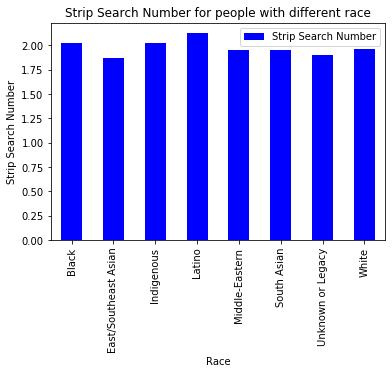

In [50]:
kaggle_strip_group_mean=kaggle_final_strip.iloc[:,1].rename_axis('Race').reset_index(name='Strip Search Number')
Strip_search_number=kaggle_final_strip.iloc[:,1]
kaggle_strip_group_mean.plot.bar(x='Race',color='blue')
plt.ylabel('Strip Search Number')
plt.title('Strip Search Number for people with different race')

In [51]:
arrest_counts=kaggle.groupby('PersonID')['ArrestID'].nunique()

In [52]:
arrest_counts

PersonID
300000    1
300001    1
300002    1
300003    8
300004    1
         ..
337342    5
337343    1
337344    1
337345    1
337346    1
Name: ArrestID, Length: 37347, dtype: int64

In [53]:
strip_counts=kaggle.groupby('PersonID')['StripSearch'].nunique()

In [54]:
strip_counts

PersonID
300000    1
300001    1
300002    1
300003    2
300004    1
         ..
337342    1
337343    1
337344    1
337345    1
337346    1
Name: StripSearch, Length: 37347, dtype: int64

In [55]:
Strip_frequency=strip_counts/arrest_counts

In [56]:
Strip_frequency.astype('float64')

PersonID
300000    1.00
300001    1.00
300002    1.00
300003    0.25
300004    1.00
          ... 
337342    0.20
337343    1.00
337344    1.00
337345    1.00
337346    1.00
Length: 37347, dtype: float64

In [57]:
race=kaggle.groupby('PersonID')['Perceived_Race'].unique()

In [58]:
race

PersonID
300000    [East/Southeast Asian]
300001                   [White]
300002                   [White]
300003                   [White]
300004                   [Black]
                   ...          
337342                   [White]
337343                   [White]
337344                   [Black]
337345                   [Black]
337346                   [White]
Name: Perceived_Race, Length: 37347, dtype: object

In [59]:
age=kaggle.groupby('PersonID')['Age_group__at_arrest_'].unique()

In [60]:
age

PersonID
300000                         [Aged 35 to 44 years]
300001                   [Aged 17 years and younger]
300002                         [Aged 35 to 44 years]
300003    [Aged 25 to 34 years, Aged 35 to 44 years]
300004                         [Aged 25 to 34 years]
                             ...                    
337342                   [Aged 17 years and younger]
337343                         [Aged 35 to 44 years]
337344                         [Aged 18 to 24 years]
337345                     [Aged 65 years and older]
337346                         [Aged 18 to 24 years]
Name: Age_group__at_arrest_, Length: 37347, dtype: object

In [61]:
sex=kaggle.groupby('PersonID')['Sex'].unique()

In [62]:
sex

PersonID
300000    [M]
300001    [F]
300002    [M]
300003    [M]
300004    [M]
         ... 
337342    [M]
337343    [M]
337344    [M]
337345    [M]
337346    [M]
Name: Sex, Length: 37347, dtype: object

In [63]:
Data1 = {'Sex': sex,
        'Race':race,
        'arrest_counts':arrest_counts,
         'Age_group__at_arrest_':age,
        'strip_counts':strip_counts,
        'strip_search_rate':Strip_frequency}

In [118]:
df= pd.DataFrame(Data1)
df = df.applymap(lambda x: str(x).replace('[','').replace(']',''))
df
df['Sex'] = df['Sex'].replace(['"', "'"], '', regex=True)
df['Race'] = df['Race'].replace(['"', "'"], '', regex=True)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['"', "'"], '', regex=True)
df
df = df[df['Sex'].isin(['M', 'F', 'U'])]
age_to_keep=['Aged 17 years and younger','Aged 18 to 24 years','Aged 25 to 34 years','Aged 35 to 44 years','Aged 45 to 54 years','Aged 55 to 64 years','Aged 65 years and older']
races_to_keep = ['White', 'Black', 'Unknown_or_Legacy', 'East_Southeast_Asian', 'South_Asian', 'Middle_Eastern', 'Indigenous', 'Latino']
cat_rename_dict = {'Unknown or Legacy': 'Unknown_or_Legacy', 'East/Southeast Asian': 'East_Southeast_Asian', 'Middle-Eastern':'Middle_Eastern','South Asian': 'South_Asian'}
df['Race'] = df['Race'].replace(cat_rename_dict)
df_filtered = df[df['Race'].isin(races_to_keep)]
df_filtered1= df_filtered[df_filtered['Age_group__at_arrest_'].isin(age_to_keep)]

In [119]:
df1=df_filtered1.copy()

In [120]:
df1.reset_index(inplace=True,drop=True)
df1

,Sex,Race,arrest_counts,Age_group__at_arrest_,strip_counts,strip_search_rate
0,M,East_Southeast_Asian,1,Aged 35 to 44 years,1,1.0
1,F,White,1,Aged 17 years and younger,1,1.0
2,M,White,1,Aged 35 to 44 years,1,1.0
3,M,Black,1,Aged 25 to 34 years,1,1.0
4,M,South_Asian,1,Aged 45 to 54 years,1,1.0
...,...,...,...,...,...,...
34037,M,White,5,Aged 17 years and younger,1,0.2
34038,M,White,1,Aged 35 to 44 years,1,1.0
34039,M,Black,1,Aged 18 to 24 years,1,1.0
34040,M,Black,1,Aged 65 years and older,1,1.0


In [67]:
df1.Sex.value_counts()

M    26925
F     7114
U        3
Name: Sex, dtype: int64

In [68]:
df1.Age_group__at_arrest_.value_counts()

Aged 25 to 34 years          10274
Aged 35 to 44 years           7512
Aged 18 to 24 years           5801
Aged 45 to 54 years           4780
Aged 55 to 64 years           2792
Aged 17 years and younger     1867
Aged 65 years and older       1016
Name: Age_group__at_arrest_, dtype: int64

In [69]:
df1.Race.value_counts()

White                   13542
Black                    9310
East_Southeast_Asian     2825
Unknown_or_Legacy        2820
South_Asian              2187
Middle_Eastern           1827
Latino                   1000
Indigenous                531
Name: Race, dtype: int64

In [70]:
one_hot_enc=prep.OneHotEncoder(sparse=False)

In [71]:
categorical_encoded_Q2=one_hot_enc.fit_transform(df1[['Sex']])
Gender=pd.DataFrame(categorical_encoded_Q2)
Gender.columns='Woman Man Unisex'.split(" ")

In [72]:
Gender.head(20)

,Woman,Man,Unisex
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [73]:
categorical_encoded_Q5=one_hot_enc.fit_transform(df1[['Race']])
Race1=pd.DataFrame(categorical_encoded_Q5)
Race1.columns='Black East_Southeast_Asian Indigenous Latino Middle_Eastern South_Asian Unknown_or_Legacy White'.split(" ")

In [74]:
Race1

,Black,East_Southeast_Asian,Indigenous,Latino,Middle_Eastern,South_Asian,Unknown_or_Legacy,White
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
34037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df3=df1[['strip_search_rate']]
df3

,strip_search_rate
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
34037,0.2
34038,1.0
34039,1.0
34040,1.0


In [76]:
df4=pd.concat([Gender,Race1,df3],axis=1)
df4['strip_search_rate'] = pd.to_numeric(df4['strip_search_rate'], errors='coerce').astype('float64')
df4

,Woman,Man,Unisex,Black,East_Southeast_Asian,Indigenous,Latino,Middle_Eastern,South_Asian,Unknown_or_Legacy,White,strip_search_rate
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2
34038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
34039,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# EDA

In [77]:
df4

,Woman,Man,Unisex,Black,East_Southeast_Asian,Indigenous,Latino,Middle_Eastern,South_Asian,Unknown_or_Legacy,White,strip_search_rate
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2
34038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
34039,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


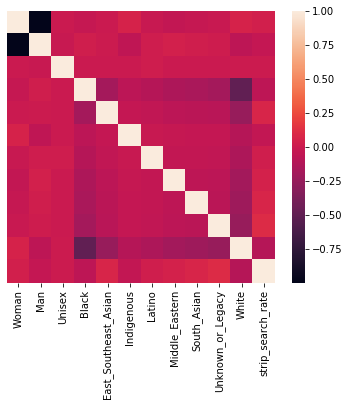

In [78]:
feature=df4.iloc[:,:-1]
import seaborn as sns
plt.figure(figsize=(6,5))
cor=df4.corr()
ax=sns.heatmap(cor,xticklabels=1,yticklabels=False)

In [79]:
cor

,Woman,Man,Unisex,Black,East_Southeast_Asian,Indigenous,Latino,Middle_Eastern,South_Asian,Unknown_or_Legacy,White,strip_search_rate
Woman,1.000000,-0.999734,-0.004825,-0.029756,-0.006642,0.058326,-0.019673,-0.044820,-0.028593,-0.008471,0.062594,0.037608
Man,-0.999734,1.000000,-0.018260,0.029884,0.006706,-0.058289,0.019280,0.044864,0.028646,0.008534,-0.062704,-0.037707
Unisex,-0.004825,-0.018260,1.000000,-0.005760,-0.002824,-0.001182,0.016899,-0.002236,-0.002460,-0.002821,0.005157,0.004513
Black,-0.029756,0.029884,-0.005760,1.000000,-0.184569,-0.077232,-0.106736,-0.146112,-0.160761,-0.184391,-0.498666,-0.065755
East_Southeast_Asian,-0.006642,0.006706,-0.002824,-0.184569,1.000000,-0.037868,-0.052334,-0.071640,-0.078822,-0.090408,-0.244500,0.076146
Indigenous,0.058326,-0.058289,-0.001182,-0.077232,-0.037868,1.000000,-0.021899,-0.029977,-0.032983,-0.037831,-0.102310,-0.044800
Latino,-0.019673,0.019280,0.016899,-0.106736,-0.052334,-0.021899,1.000000,-0.041429,-0.045583,-0.052283,-0.141394,0.030002
Middle_Eastern,-0.044820,0.044864,-0.002236,-0.146112,-0.071640,-0.029977,-0.041429,1.000000,-0.062399,-0.071571,-0.193555,0.052417
South_Asian,-0.028593,0.028646,-0.002460,-0.160761,-0.078822,-0.032983,-0.045583,-0.062399,1.000000,-0.078746,-0.212961,0.071129
Unknown_or_Legacy,-0.008471,0.008534,-0.002821,-0.184391,-0.090408,-0.037831,-0.052283,-0.071571,-0.078746,1.000000,-0.244264,0.107388


In [80]:
feature_standardized=prep.StandardScaler().fit_transform(feature)
feature_standardized

array([[-0.51399025,  0.51412725, -0.00938798, ..., -0.26202069,
        -0.3005344 , -0.81276403],
       [ 1.9455622 , -1.94504374, -0.00938798, ..., -0.26202069,
        -0.3005344 ,  1.23036941],
       [-0.51399025,  0.51412725, -0.00938798, ..., -0.26202069,
        -0.3005344 ,  1.23036941],
       ...,
       [-0.51399025,  0.51412725, -0.00938798, ..., -0.26202069,
        -0.3005344 , -0.81276403],
       [-0.51399025,  0.51412725, -0.00938798, ..., -0.26202069,
        -0.3005344 , -0.81276403],
       [-0.51399025,  0.51412725, -0.00938798, ..., -0.26202069,
        -0.3005344 ,  1.23036941]])

In [81]:
import seaborn as sns
correlation_strip =cor.iloc[:,-1]
correlation_strip=pd.DataFrame(correlation_strip)
abs_correlation_strip=abs(correlation_strip.strip_search_rate)
abs_correlation_strip=pd.DataFrame(abs_correlation_strip)
abs_correlation_strip['Variable']=abs_correlation_strip.index
abs_correlation_strip.head()

,strip_search_rate,Variable
Woman,0.037608,Woman
Man,0.037707,Man
Unisex,0.004513,Unisex
Black,0.065755,Black
East_Southeast_Asian,0.076146,East_Southeast_Asian


[Text(0, 0, 'Woman'),
 Text(0, 0, 'Man'),
 Text(0, 0, 'Unisex'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'East_Southeast_Asian'),
 Text(0, 0, 'Indigenous'),
 Text(0, 0, 'Latino'),
 Text(0, 0, 'Middle_Eastern'),
 Text(0, 0, 'South_Asian'),
 Text(0, 0, 'Unknown_or_Legacy'),
 Text(0, 0, 'White'),
 Text(0, 0, 'strip_search_rate')]

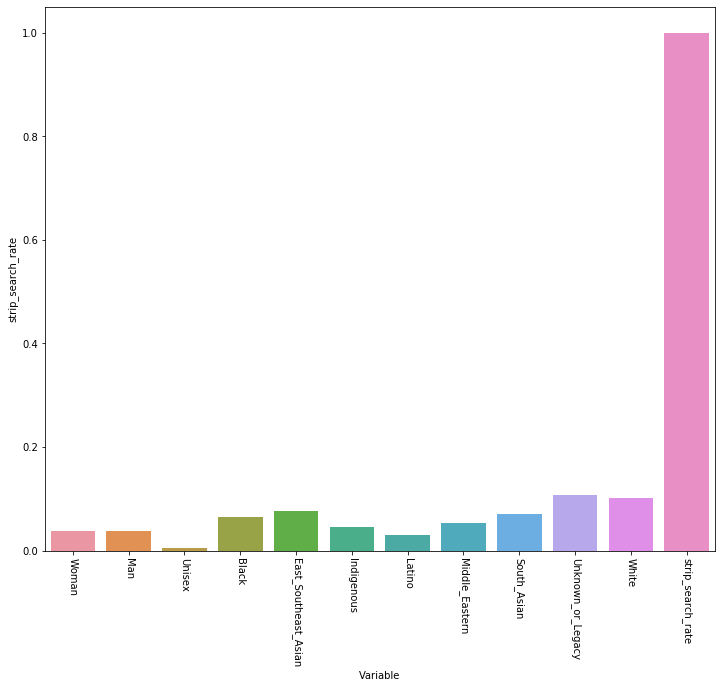

In [82]:
plt.figure(figsize=(12,10))
ax=sns.barplot(x='Variable',y='strip_search_rate',data=abs_correlation_strip)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-90)

# T test

In [122]:
from scipy.stats import ttest_ind

In [123]:
df1['strip_search_rate'] = pd.to_numeric(df1['strip_search_rate'], errors='coerce').astype('float64')
df1

,Sex,Race,arrest_counts,Age_group__at_arrest_,strip_counts,strip_search_rate
0,M,East_Southeast_Asian,1,Aged 35 to 44 years,1,1.0
1,F,White,1,Aged 17 years and younger,1,1.0
2,M,White,1,Aged 35 to 44 years,1,1.0
3,M,Black,1,Aged 25 to 34 years,1,1.0
4,M,South_Asian,1,Aged 45 to 54 years,1,1.0
...,...,...,...,...,...,...
34037,M,White,5,Aged 17 years and younger,1,0.2
34038,M,White,1,Aged 35 to 44 years,1,1.0
34039,M,Black,1,Aged 18 to 24 years,1,1.0
34040,M,Black,1,Aged 65 years and older,1,1.0


In [124]:
male = df1[df1['Sex'] == 'M']['strip_search_rate']
female = df1[df1['Sex'] == 'F']['strip_search_rate']
t_stat, p_val = ttest_ind(male, female)

In [125]:
t_stat

-6.9474689021773886

In [126]:
p_val

3.785762503039802e-12

In [127]:
Black1 = df1[df1['Race'] == 'Black']['strip_search_rate']
White1 = df1[df1['Race'] == 'White']['strip_search_rate']
Indigenous1 = df1[df1['Race'] == 'Indigenous']['strip_search_rate']
EastSoutheastAsian1 = df1[df1['Race'] == 'East_Southeast_Asian']['strip_search_rate']
White = df1[df1['Race'] == 'White']['strip_search_rate']

In [128]:
#Black and White
t_stat, p_val = ttest_ind(White1,Black1)

In [129]:
t_stat

-1.2703067054086195

In [130]:
p_val

0.20398833492747032

In [131]:
#White and Indigenous
t_stat, p_val = ttest_ind(White1,Indigenous1)

In [132]:
t_stat

4.66609072840387

In [133]:
p_val

3.0981333455638535e-06

In [134]:
#White and Eastasian
t_stat, p_val = ttest_ind(White1,EastSoutheastAsian1)

In [135]:
t_stat

-17.447542180175144

In [136]:
p_val

1.4683529377165404e-67

In [137]:
#Black and Eastasian
t_stat, p_val = ttest_ind(Black1,EastSoutheastAsian1)

In [138]:
t_stat

-16.880468168117947

In [139]:
p_val

3.2911216255288874e-63

In [140]:
#Black and Indigenous
t_stat, p_val = ttest_ind(Black1,Indigenous1)

In [141]:
t_stat

5.17683103601552

In [142]:
p_val

2.301435626924308e-07

# Anova

In [143]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [144]:
model = ols('strip_search_rate ~ Race', data=df1).fit()

In [145]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq       df           F         PR(>F)
Race        66.523241      7.0  179.055325  1.432096e-261
Residual  1806.346713  34034.0         NaN            NaN


In [146]:
tukey_results = pairwise_tukeyhsd(df1['strip_search_rate'], df1['Race'])
print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East_Southeast_Asian   0.0845  0.001  0.0695  0.0995   True
               Black           Indigenous  -0.0583  0.001 -0.0895 -0.0272   True
               Black               Latino   0.0656  0.001  0.0424  0.0888   True
               Black       Middle_Eastern   0.0768  0.001  0.0589  0.0946   True
               Black          South_Asian   0.0888  0.001  0.0722  0.1054   True
               Black    Unknown_or_Legacy    0.109  0.001  0.0939   0.124   True
               Black                White  -0.0044  0.835 -0.0138   0.005  False
East_Southeast_Asian           Indigenous  -0.1428  0.001 -0.1759 -0.1098   True
East_Southeast_Asian               Latino  -0.0189 0.3324 -0.0446  0.0068  False
East_Southeast_Asian       M

In [147]:
model = ols('strip_search_rate ~ C(Sex) + C(Age_group__at_arrest_) + C(Sex):C(Age_group__at_arrest_)', df1).fit()
print(sm.stats.anova_lm(model, typ=2))

                                       sum_sq       df          F  \
C(Sex)                          -2.857631e-07      2.0  -0.000003   
C(Age_group__at_arrest_)         1.509756e+01      6.0  46.045378   
C(Sex):C(Age_group__at_arrest_)  6.171962e-01     12.0   0.941180   
Residual                         1.859378e+03  34025.0        NaN   

                                       PR(>F)  
C(Sex)                           1.000000e+00  
C(Age_group__at_arrest_)         1.202094e-38  
C(Sex):C(Age_group__at_arrest_)  4.875186e-01  
Residual                                  NaN  


C:\Users\Kaiyang Bian\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Kaiyang Bian\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Kaiyang Bian\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


In [148]:
mc = MultiComparison(df1['strip_search_rate'], df1['Age_group__at_arrest_'])
tukey_result = mc.tukeyhsd()
print(tukey_result)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
          group1                   group2         meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
Aged 17 years and younger     Aged 18 to 24 years   0.0089 0.7622 -0.0095  0.0272  False
Aged 17 years and younger     Aged 25 to 34 years   -0.024  0.001 -0.0414 -0.0067   True
Aged 17 years and younger     Aged 35 to 44 years  -0.0338  0.001 -0.0517  -0.016   True
Aged 17 years and younger     Aged 45 to 54 years  -0.0228 0.0065 -0.0416  -0.004   True
Aged 17 years and younger     Aged 55 to 64 years  -0.0025    0.9 -0.0231  0.0182  False
Aged 17 years and younger Aged 65 years and older   0.0349 0.0025   0.008  0.0618   True
      Aged 18 to 24 years     Aged 25 to 34 years  -0.0329  0.001 -0.0442 -0.0216   True
      Aged 18 to 24 years     Aged 35 to 44 years  -0.0427  0.001 -0.0548 -0.0307   True
      Aged 18 to 24 y

In [149]:
mc1= MultiComparison(df1['strip_search_rate'], df1['Sex'])
tukey_result1=mc1.tukeyhsd()
print(tukey_result1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     F      M  -0.0217  0.001  -0.029 -0.0144   True
     F      U   0.0956 0.7395 -0.2217  0.4129  False
     M      U   0.1173 0.6477 -0.1999  0.4345  False
----------------------------------------------------
